**Assignment Description:**

At Sunbase, we prioritize understanding our customers and ensuring their satisfaction. To achieve this,
we want to develop a machine learning model that predicts customer churn. Your task as a Machine
Learning Intern is to work on this project, following the guidelines and responsibilities outlined in the job
description.

**Objective:**

Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

**Data:**

You are provided with a dataset containing historical customer information, including customer
attributes, interactions, and whether they churned or not. The dataset is in CSV format.


#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

#Loading the Dataset

In [3]:
df=pd.read_excel("/content/customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0




> The dataset has 3 categorical and 6 numerical features respectively.





In [4]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


#Data Preprocessing

###Handling missing values and outliers

In [5]:
# check the total number of features (columns) and values (rows) in the data

print('Shape of data{}'.format(df.shape))
print('Number of rows:{}'.format(df.shape[0]))
print('Number of columns:{}'.format(df.shape[1]))

Shape of data(100000, 9)
Number of rows:100000
Number of columns:9


In [6]:
# check for null values

df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB




> The dataset does not contain any missing value.



In [8]:
# statistical analysis or description of the data

df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000




> The description of the data is observed for numerical features only. Categorical features are not really relevant here. Description of CustomerID is also irrelevant due to its unique characteristics.


In [9]:
# description of data with relevant numerical features only

num_cols=["Age","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB"]
df_num=df[num_cols]

df_num.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650
std,15.280283,6.926461,20.230696,130.463063
min,18.000000,1.000000,30.000000,50.000000
25%,31.000000,6.000000,47.540000,161.000000
50%,44.000000,12.000000,65.010000,274.000000
75%,57.000000,19.000000,82.640000,387.000000
max,70.000000,24.000000,100.000000,500.000000


In [10]:
# Interquartile Range or IQR to detect outliers
# outliers are predicted within the range that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR

def detect_outliers(df_num):
    Q1 = df_num.quantile(0.25) # 25th percentile
    Q3 = df_num.quantile(0.75) # 75th percentile
    IQR = Q3 - Q1
    IQR
    print(((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any())



In [11]:
detect_outliers(df_num)

Age                           False
Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
dtype: bool




> No outliers are detected within the range



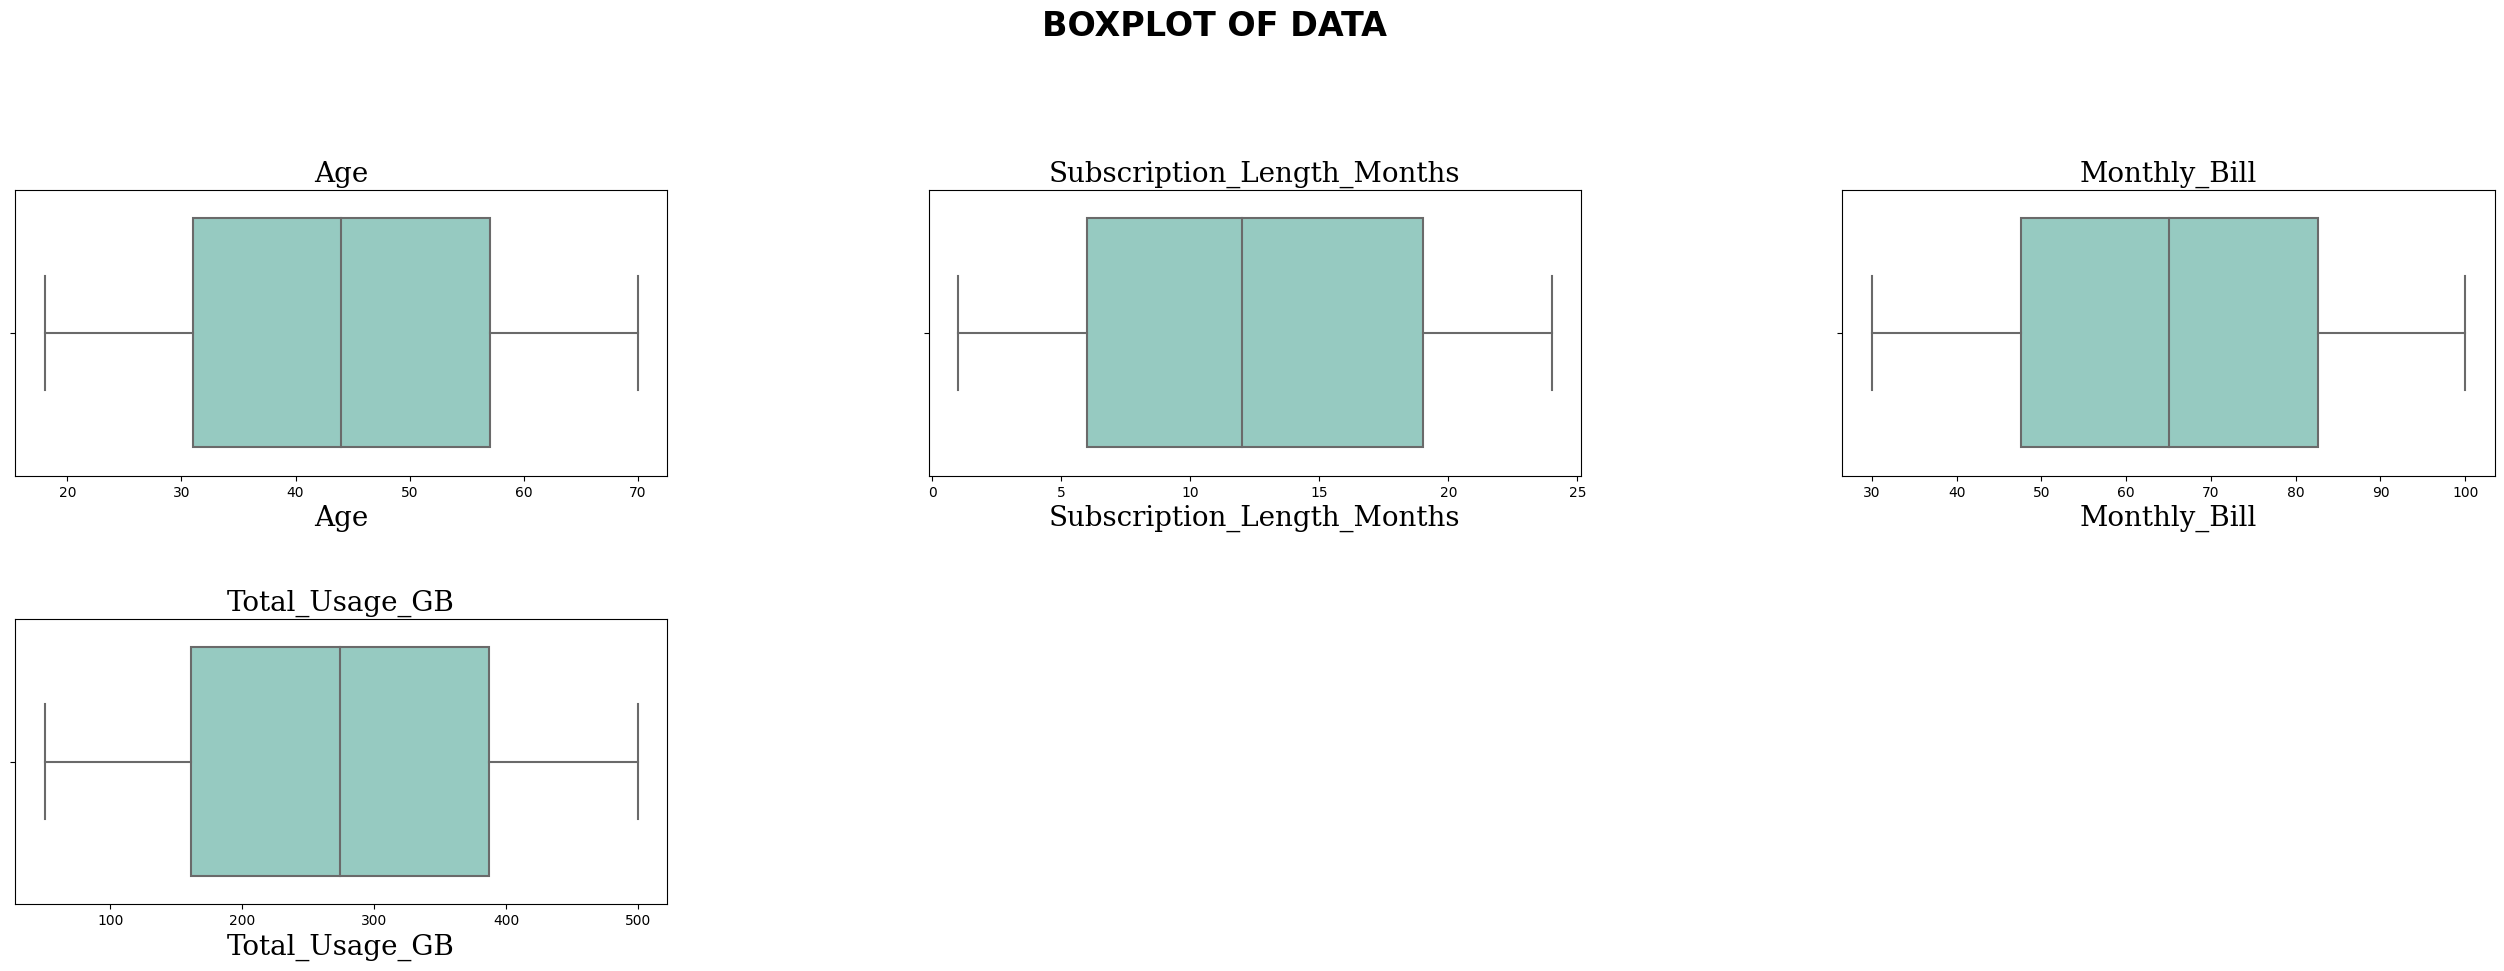

In [12]:
# box and whisker plot for observing outliers

fig = plt.figure(figsize=[32,30])
axtitle_dict = {'family': 'serif', 'color': 'black','size': 20}

fig.suptitle('BOXPLOT OF DATA', fontsize=24, fontweight='bold')
fig.subplots_adjust(top=0.92,hspace=0.5, wspace=0.4)

for i ,col in enumerate(num_cols):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col,palette="Set3" );

    ax1.set_title(f'{col}',fontdict=axtitle_dict);
    ax1.set_xlabel(f'{col}',fontdict=axtitle_dict);



> The plots also support the fact that no significant outliers are present in the data.



###Exploratory data analysis

In [13]:
# check the percentage of customers who cancelled or unsubscribed from service

churn_perc=df['Churn'].value_counts(normalize=True)
churn_perc * 100

0    50.221
1    49.779
Name: Churn, dtype: float64



> About 50.221% people did not cancel whereas 49.779% people cancelled the service.



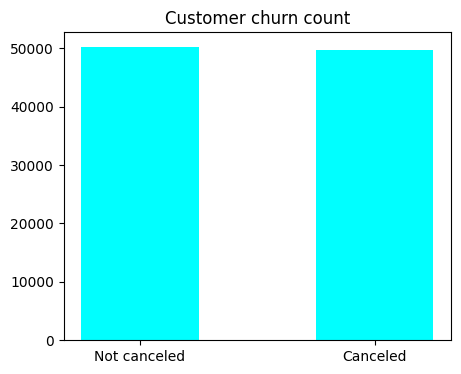

In [14]:
plt.figure(figsize=(5,4))
plt.title('Customer churn count')
plt.bar(['Not canceled','Canceled'],df['Churn'].value_counts(),color='cyan',width=0.5)
plt.show()



> The difference between number of customers who cancelled and who did not cancel is almost similar.



In [15]:
# check the impact of locations on churning

df.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

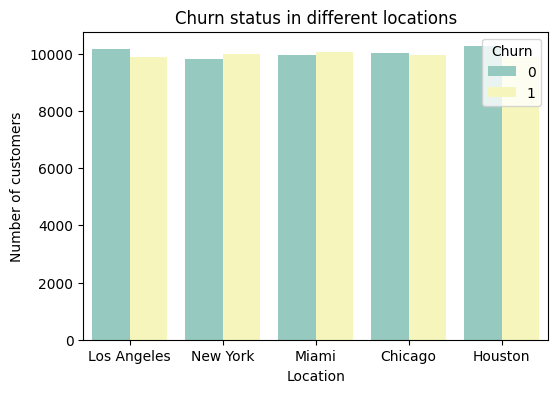

In [16]:
plt.figure(figsize=(6,4))
ax1=sns.countplot(x='Location',hue='Churn',palette='Set3',data=df)
legend_labels,_=ax1.get_legend_handles_labels()
plt.title('Churn status in different locations')
plt.xlabel('Location')
plt.ylabel('Number of customers')
plt.show()



> The churning rate for any particular location is not too different from that of any other location provided in the data.



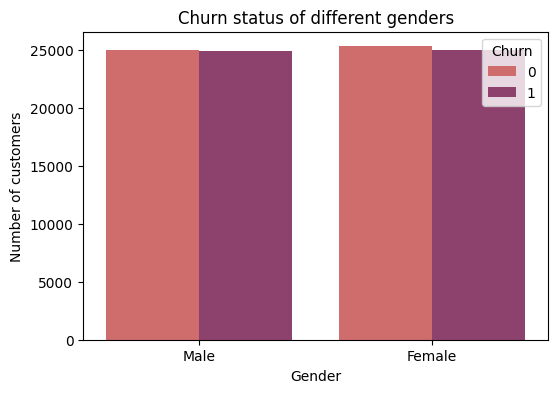

In [17]:
# check influence of gender on churning

plt.figure(figsize=(6,4))
ax1=sns.countplot(x='Gender',hue='Churn',palette='flare',data=df)
legend_labels,_=ax1.get_legend_handles_labels()
plt.title('Churn status of different genders')
plt.xlabel('Gender')
plt.ylabel('Number of customers')
plt.show()



> The ratio of churning for both males and females are almost alike.



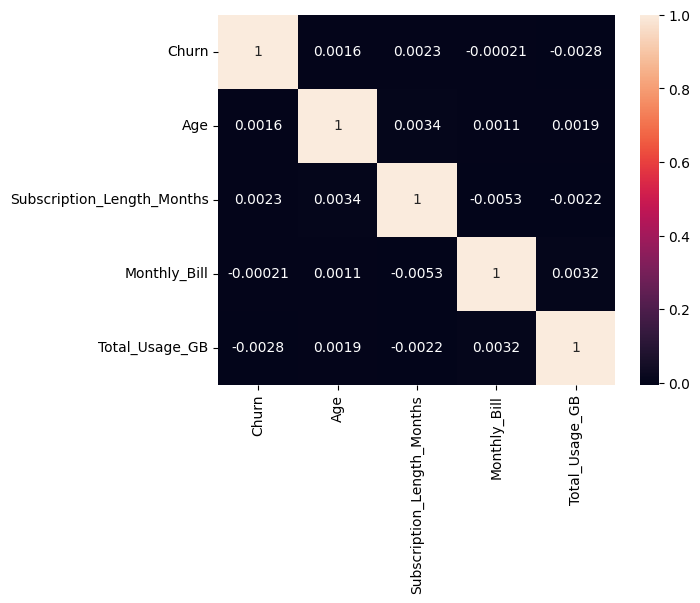

In [18]:
# Heatmap - check the correlation among relevant features for feature engineering


heatmap=sns.heatmap(df[['Churn','Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']].corr(),annot=True)



> It is observed that there is no significant correlation between churning rate and the numerical features although at 0.0023 'Subscription_Length_Months' has the highest correlation.


###Encoding categorical variables

In [19]:
# one hot encoding categorical (Gender and Location) features

df2=df
df2=pd.get_dummies(df2,columns=['Gender','Location'])
df2.head()

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,17,73.36,236,0,0,1,0,0,1,0,0
1,2,Customer_2,62,1,48.76,172,0,1,0,0,0,0,0,1
2,3,Customer_3,24,5,85.47,460,0,1,0,0,0,1,0,0
3,4,Customer_4,36,3,97.94,297,1,1,0,0,0,0,1,0
4,5,Customer_5,46,19,58.14,266,0,1,0,0,0,0,1,0


In [20]:
# dropping irrelevant features

df3=df2
df3=df3.rename(columns={"Gender_Female":"Gender"}) # rename Gender column so 1 indicates Female , 0 indicates Male
df3=df3.drop(['CustomerID','Name','Gender_Male'],axis=1)
df3.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,0,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,0,0,1
2,24,5,85.47,460,0,1,0,0,1,0,0
3,36,3,97.94,297,1,1,0,0,0,1,0
4,46,19,58.14,266,0,1,0,0,0,1,0




> 'CustomerID' and 'Name' are dropped as these are unique values for each customer and does not contribute towards learning of the model.

In [21]:
print ("Shape of data : " , df3.shape)
X= df3.drop("Churn" , axis = 1)
Y=df3["Churn"]
print ("Shape of input : " , X.shape)
print ("Shape of output : ", Y.shape)

Shape of data :  (100000, 11)
Shape of input :  (100000, 10)
Shape of output :  (100000,)


#Feature Engineering

Chi Squared analysis is performed to check relevant features for training the model.

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [23]:
corr_matrix=X.corr()
features=corr_matrix.index

x=pd.DataFrame(MinMaxScaler().fit(X).transform(X))
y=Y
x.head()
best_feature=SelectKBest(score_func=chi2,k=5)
fit=best_feature.fit(x,y)

scores=pd.DataFrame(fit.scores_)
col=pd.DataFrame(features)

feature_score=pd.concat([scores,col],axis=1)
feature_score.columns=['Score','Feature']
feature_score.head()


,Score,Feature
0,0.041922,Age
1,0.098406,Subscription_Length_Months
2,0.000745,Monthly_Bill
3,0.136099,Total_Usage_GB
4,0.223949,Gender


In [24]:
feature_score.nlargest(10,'Score')

,Score,Feature
6,3.614164,Location_Houston
9,2.730100,Location_New York
8,2.191934,Location_Miami
7,1.847498,Location_Los Angeles
4,0.223949,Gender
3,0.136099,Total_Usage_GB
1,0.098406,Subscription_Length_Months
0,0.041922,Age
5,0.020474,Location_Chicago
2,0.000745,Monthly_Bill




> Location , Gender , Total_Usage_GB are some features that are important for training a model.



Splitting the data into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

Z-Score oor normalization of the data

In [26]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [27]:
print ("Shape of training input : ", x_train.shape)
print ("Shape of training output : ", y_train.shape)
print ("Shape of testing input : ", x_test.shape)
print ("Shape of testing output : ", y_test.shape)

Shape of training input :  (80000, 10)
Shape of training output :  (80000,)
Shape of testing input :  (20000, 10)
Shape of testing output :  (20000,)


#Model Building

Applying Machine Learning Algorithms

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score ,  precision_score , recall_score

In [72]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= []


In [62]:
# Define a function to store the results and metrics of each model

def Model_features(X_train , y_train , X_test , y_test , y_pred , classifier  , model_name):

    accuracy , precision , recall , f1_s = round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average="micro")  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)

    print(metrics.classification_report(y_test, y_pred))

In [32]:
# Define a function for confusion matrix plot

def confusion_matrix_plot(X_test , y_test , y_pred, classifier ,classifier_name):
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No churn", "Churn"])
    plt.figure(figsize=(4,4))
    cm_display.plot()
    plt.show()


Logistic Regression

In [34]:
model_lr= LogisticRegression(random_state=0)
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
model_lr.score(x_test , y_test)

0.50365

Accuracy Score is :0.504
Precision Score is :0.504
Recall Score is :0.372
f1  Score is :0.429
              precision    recall  f1-score   support

           0       0.50      0.64      0.56      9979
           1       0.51      0.37      0.43     10021

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



<Figure size 400x400 with 0 Axes>

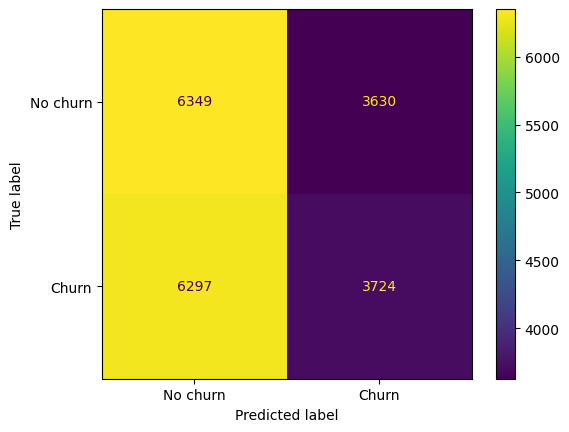

In [73]:
Model_features(x_train , y_train , x_test , y_test  , y_pred , model_lr , "Logistic Regression")
confusion_matrix_plot(x_test , y_test , y_pred, model_lr , "Logistic Regression")

Support Vector Machine

In [36]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
svm.score(x_test , y_test)

0.4975

Accuracy Score is :0.498
Precision Score is :0.498
Recall Score is :0.365
f1  Score is :0.421
              precision    recall  f1-score   support

           0       0.50      0.63      0.56      9979
           1       0.50      0.36      0.42     10021

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



<Figure size 400x400 with 0 Axes>

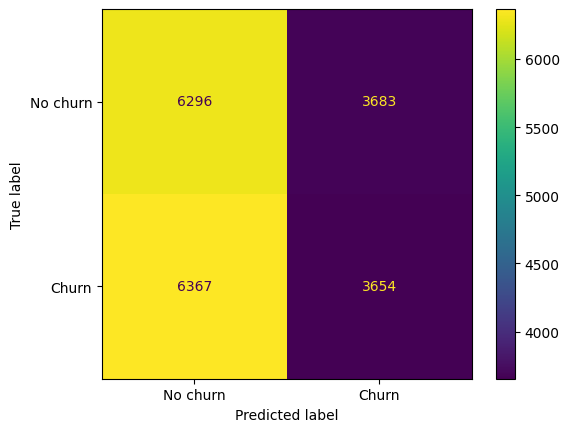

In [74]:
Model_features(x_train , y_train , x_test , y_test  , y_pred_svm , svm , "Support Vector Machine")
confusion_matrix_plot(x_test , y_test , y_pred_svm, svm , "Support Vector Machine")

Gradient Boosting Classifier

In [38]:
xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(x_train, y_train)
y_pred_xg = xg.predict(x_test)
xg.score(x_test , y_test)

0.5001

Accuracy Score is :0.5
Precision Score is :0.5
Recall Score is :0.455
f1  Score is :0.477
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      9979
           1       0.50      0.46      0.48     10021

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



<Figure size 400x400 with 0 Axes>

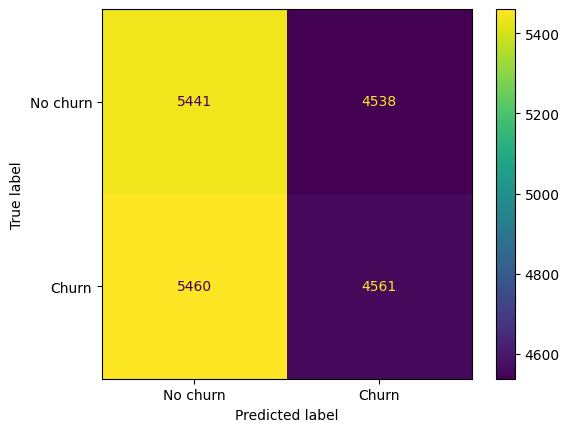

In [75]:
Model_features(x_train , y_train , x_test , y_test  , y_pred_xg , xg , "Gradient Boost Classifier")
confusion_matrix_plot(x_test , y_test , y_pred_xg, xg , "Gradient Boost Classifier")

K-nearest Neighbors

In [40]:
knn=KNeighborsClassifier(5)
knn.fit(x_train, y_train)
y_pred_knn = xg.predict(x_test)
knn.score(x_test , y_test)

0.50015

Accuracy Score is :0.5
Precision Score is :0.5
Recall Score is :0.455
f1  Score is :0.477
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      9979
           1       0.50      0.46      0.48     10021

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



<Figure size 400x400 with 0 Axes>

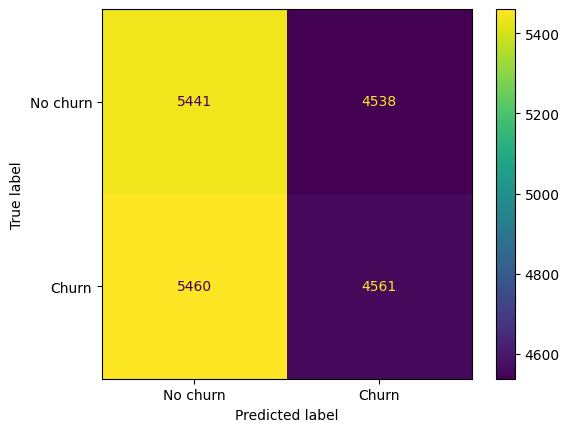

In [76]:
Model_features(x_train , y_train , x_test , y_test  , y_pred_knn , knn , "KNN Classifier")
confusion_matrix_plot(x_test , y_test , y_pred_knn, knn , "KNN Classifier")

Decision Tree Classifier

In [42]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)
dtc.score(x_test , y_test)

0.5032

Accuracy Score is :0.503
Precision Score is :0.503
Recall Score is :0.503
f1  Score is :0.504
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      9979
           1       0.50      0.50      0.50     10021

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



<Figure size 400x400 with 0 Axes>

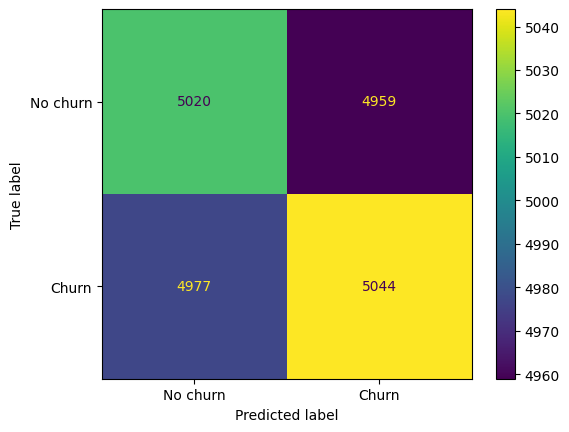

In [77]:
Model_features(x_train , y_train , x_test , y_test  , y_pred_dtc , dtc , "Decision Tree Classifier")
confusion_matrix_plot(x_test , y_test , y_pred_dtc, dtc , "Decision Tree Classifier")

Random Forest Classifier

In [44]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=40)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf.score(x_test , y_test)

0.5012

Accuracy Score is :0.501
Precision Score is :0.501
Recall Score is :0.481
f1  Score is :0.492
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      9979
           1       0.50      0.48      0.49     10021

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



<Figure size 400x400 with 0 Axes>

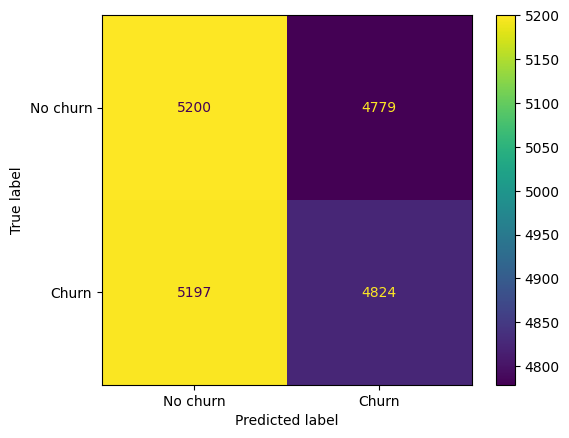

In [78]:
Model_features(x_train , y_train , x_test , y_test  , y_pred_rf , rf , "Random Forest Classifier")
confusion_matrix_plot(x_test , y_test , y_pred_rf, rf , "Random Forest Classifier")

In [79]:
# check metrcis values for each model

dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list , 'f1_score':f1_score_list , 'Recall':recall_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df

,Model,Accuracy,Precision,f1_score,Recall
0,Logistic Regression,0.504,0.504,0.429,0.372
4,Decision Tree Classifier,0.503,0.503,0.504,0.503
5,Random Forest Classifier,0.501,0.501,0.492,0.481
2,Gradient Boost Classifier,0.500,0.500,0.477,0.455
3,KNN Classifier,0.500,0.500,0.477,0.455
1,Support Vector Machine,0.498,0.498,0.421,0.365


Applying Neural Networks

In [55]:
import tensorflow as tf
from tensorflow import keras

model_dnn=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_dnn.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])


In [56]:
history= model_dnn.fit(x_train,y_train,epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
2250/2250 [==============================] - 12s 4ms/step - loss: 0.6953 - accuracy: 0.5027 - val_loss: 0.6940 - val_accuracy: 0.5050
Epoch 2/50
2250/2250 [==============================] - 7s 3ms/step - loss: 0.6939 - accuracy: 0.5025 - val_loss: 0.6943 - val_accuracy: 0.4996
Epoch 3/50
2250/2250 [==============================] - 7s 3ms/step - loss: 0.6934 - accuracy: 0.5063 - val_loss: 0.6939 - val_accuracy: 0.4991
Epoch 4/50
2250/2250 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5083 - val_loss: 0.6940 - val_accuracy: 0.4951
Epoch 5/50
2250/2250 [==============================] - 8s 3ms/step - loss: 0.6930 - accuracy: 0.5094 - val_loss: 0.6937 - val_accuracy: 0.4961
Epoch 6/50
2250/2250 [==============================] - 8s 3ms/step - loss: 0.6930 - accuracy: 0.5080 - val_loss: 0.6940 - val_accuracy: 0.4927
Epoch 7/50
2250/2250 [==============================] - 7s 3ms/step - loss: 0.6928 - accuracy: 0.5092 - val_loss: 0.6942 - val_accuracy

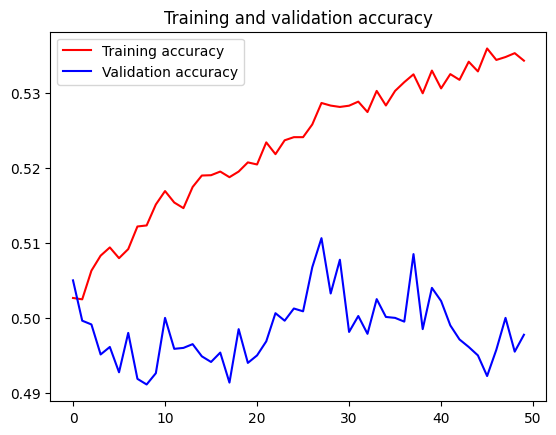

<Figure size 640x480 with 0 Axes>

In [57]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [58]:
y_true=[]
for element in y_test:
    y_true.append(np.argmax(element))
prediction_proba=model_dnn.predict(x_test)
y_pred_dnn=np.argmax(prediction_proba,axis=1)

625/625 [==============================] - 1s 2ms/step


Accuracy Score is :0.499
Precision Score is :0.499
Recall Score is :0.0
f1  Score is :0.0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9979
           1       0.00      0.00      0.00     10021

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



<Figure size 400x400 with 0 Axes>

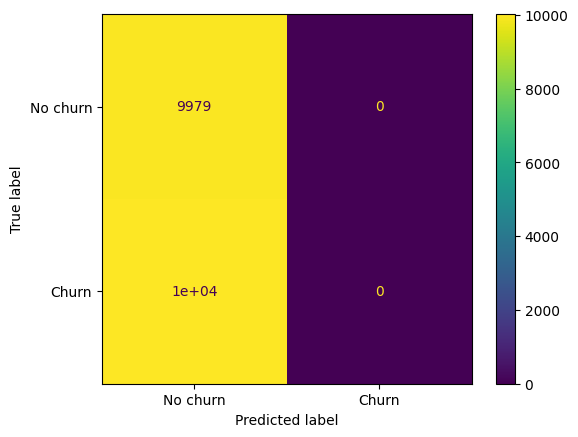

In [70]:
Model_features(x_train , y_train , x_test , y_test  , y_pred_dnn , model_dnn , "DNN")
confusion_matrix_plot(x_test , y_test , y_pred_dnn, model_dnn , "DNN")

#Hyperparameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [61]:
# Define a function for tuning hyperparameters of different models

def hyperparameter_tuning(x,y):
  algos={
      'lr':{
          'model':LogisticRegression(),
          'params':{
              'C':[0.5,1.5]
          }
      },
        'rf':{
          'model':RandomForestClassifier(),
          'params':{
              'n_estimators':[10,50],

          },
            },
        'dtree':{
          'model':DecisionTreeClassifier(),
          'params':{
              'criterion':['entropy','log_loss']

          },
      }

  }

  scores=[]
  cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name,config in algos.items():
    gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(x,y)
    scores.append(
        {
            'model':algo_name,
              'best_score':gs.best_score_, #score indicates the r2 score
         'best_params':gs.best_params_
        }
    )
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

hyperparameter_tuning(X,Y)


,model,best_score,best_params
0,lr,0.50253,{'C': 0.5}
1,rf,0.50015,{'n_estimators': 10}
2,dtree,0.50084,{'criterion': 'log_loss'}


#Model Deployment

In [80]:
# A pickle file is generated for the best performing model (Logistic Regression)

import pickle
with open('churn_prediction_model.pickle','wb') as file:
  pickle.dump(model_lr,file)

In [81]:
pip install flask-ngrok

In [ ]:
X.columns

X=X.rename (columns={"Location_Chicago":"Chicago", "Location_Houston":"Houston","Location_Los Angeles":"Los Angeles",
                       "Location_Miami":"Miami", "Location_New York":"New York"})

In [90]:
# Define a function to take input and generate prediction

def predict_churn(location,age,subs_length,monthly_bill):
  loc_index=np.where(X.columns==location)[0][0]

  x=np.zeros(len(X.columns))
  x[0]=age
  x[1]=monthly_bill
  x[2]=subs_length
  if loc_index>=0:
    x[loc_index]=1
  return model_lr.predict([x])[0]

predict_churn("Miami", 22, 2, 334.5)

1

In [82]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template

In [ ]:
app=Flask(__name__)
run_with_ngrok(app)

model=pickle.load(open("churn_prediction_model.pickle",'rb'))

@app.route('/')
def home():
    return render_template('index.html')
@app.route('/getprediction',methods=['POST'])
def getprediction():

    location = request.form.get ("location")
    age = request.form.get ("age")
    monthly_bill = request.form.get ("monthly_bill")
    subs_length = request.form.get ("subs_length")

    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=age
    x[1]=monthly_bill
    x[2]=subs_length
    if loc_index>=0:
      x[loc_index]=1

    prediction = model.predict ([x])[0]
    return render_template('index.html', output='Churn :{}'.format(prediction))



app.run()